1. 군집화(Clustering) : Kmeans

예측된 클러스터 레이블(앞 10개): [1 1 1 1 1 1 1 1 1 1]
클러스터 중심 좌표:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


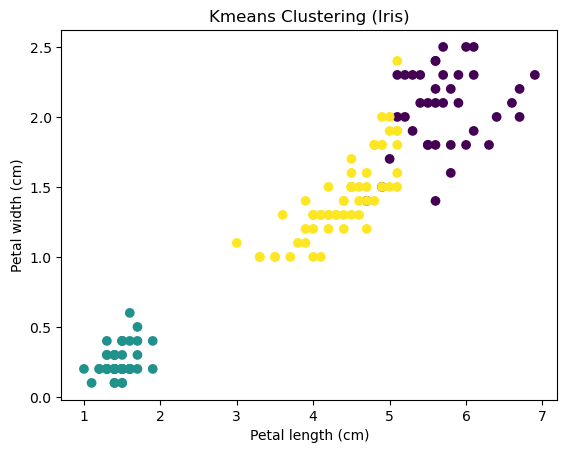

In [11]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target

# KMeans 모델 (군집 3개)
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)

print("예측된 클러스터 레이블(앞 10개):", y_pred[:10])
print("클러스터 중심 좌표:", kmeans.cluster_centers_, sep='\n')

# 시각화(Petal)
plt.scatter(X[:,2], X[:,3], c=y_pred, cmap="viridis")
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Kmeans Clustering (Iris)")
plt.show()

평가 지표
- Inertia (Elbow) : 군집 내 거리의 제곱 합
- Silhouette Score : 군집 내 응집도와 군집 간 분리도를 종합 평가

c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: User

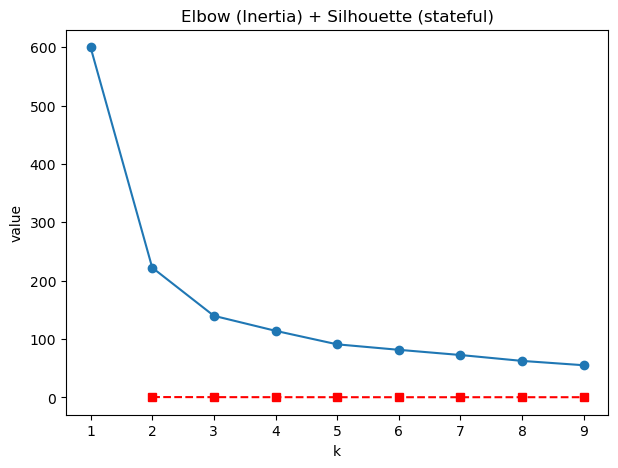

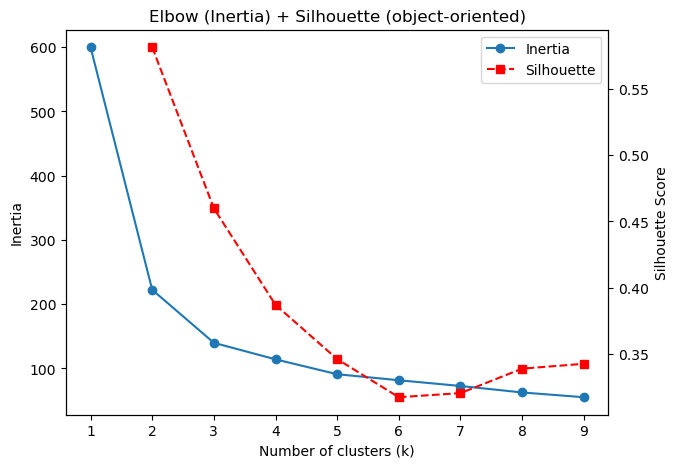

   k     inertia  silhouette
0  2  222.361705    0.581750
1  3  139.820496    0.459948
2  4  114.092547    0.386941
3  5   90.927514    0.345901
4  6   81.544391    0.317079
5  7   72.631144    0.320197
6  8   62.540606    0.338692
7  9   55.119493    0.342360


In [21]:
# 군집 품질 평가 : Inertia (Elbow) + Silhouette
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

iris = load_iris()
X = iris.data

# KMeans도 거리(유클리드) 기반 알고리즘 -> 스케일링 권장(단위/범위가 큰 특성이 군집화 지배하지 않도록) => 파이프라인 사용
def make_pipeline(k, random_state=42):
  return Pipeline([
    ("scaler", StandardScaler()),
    ("kmeans", KMeans(n_clusters=k, n_init=10, random_state=random_state))
  ])

# Inertia : 내부 응집도
inertia_k_range = range(1, 10)
inertias = []

for k in inertia_k_range:
  pipe = make_pipeline(k)
  pipe.fit(X)
  inertias.append(pipe.named_steps["kmeans"].inertia_)

# Silhouette : 응집도 + 분리도
silhouette_k_range = range(2, 10) # 이론적으로 2부터 정의됨
silhouettes = []

for k in silhouette_k_range:
  pipe = make_pipeline(k)
  
  # pipe.~ : 스케일링된 공간 적용
  # silhouette_score(DATA, LABELS) : 사용자가 입력 -> 스케일링된 X를 꺼내서 입력
  labels = pipe.fit_predict(X)
  X_scaled = pipe.named_steps["scaler"].transform(X)

  silhouettes.append(silhouette_score(X_scaled, labels))

# Plot

# 1) plt.plot : Stateful
plt.figure(figsize=(7,5))
plt.plot(inertia_k_range, inertias, marker='o', label="Inertia")
plt.plot(silhouette_k_range, silhouettes, color='r', marker='s', linestyle='--', label='Silhouette')
plt.xlabel("k")
plt.ylabel("value")
plt.title("Elbow (Inertia) + Silhouette (stateful)")
# inertia 값은 수백 단위, silhouette 값은 0~1사이이므로 siilhouette는 눌려서 안보임

# 2) plt.subplots : Object-oriented
fig, ax1 = plt.subplots(figsize=(7,5))

# inertia (elbow)
ax1.plot(inertia_k_range, inertias, marker='o', label='Inertia')
ax1.set_xlabel("Number of clusters (k)")
ax1.set_ylabel("Inertia")

# silhouette
ax2 = ax1.twinx() # x축 공유
ax2.plot(silhouette_k_range, silhouettes, color='r', marker='s', linestyle='--', label='Silhouette')
ax2.set_ylabel("Silhouette Score")

# 범례
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

plt.title("Elbow (Inertia) + Silhouette (object-oriented)")
plt.show()

# 수치 비교
df = pd.DataFrame({
  "k": list(silhouette_k_range),
  "inertia": [inertias[k-1] for k in silhouette_k_range],
  "silhouette": silhouettes
})
print(df)

Inertia
- 내부 응집도. 작을 수록 좋음
- BUT, K가 커지면 자동으로 줄어들기 때문에 엘보우 체크
- 1 > 2가 극심한 건 당연 (클러스터링 시작) => 2 이후부터 관찰해서 엘보우 지점 찾기

Silhouette
- 응집도 + 분리도. -1 ~ 1
- 1에 가까울수록 좋다
- 0 근처 -> 군집 경계에 있어 애매함
- 음수 -> 다른 군집에 속하는 게 낫다 (군집 잘못 배치)

실루엣 점수가 가장 높은 K지점(피크)가 K 후보<br>
단, 실루엣 점수 피크는 실제 라벨수와 일치하지 않는다.<br>

따라서, K는 silhouette + inertia(엘보우) + 도메인 지식 종합해서 결정
- 실루엣 -> K=2
- 엘보우 -> K=3
- 도메인 지식 -> 실제 품종 3개이므로 K=3

<br><br>
샘플별 실루엣 분포 : 플롯 시각화
- 군집별 품질 파악
- 군집 크기 불균형 확인 : 막대 두께(세로)
- 잘못된 분류 확인 : 음수

c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K=3 평균 실루엣: 0.4599


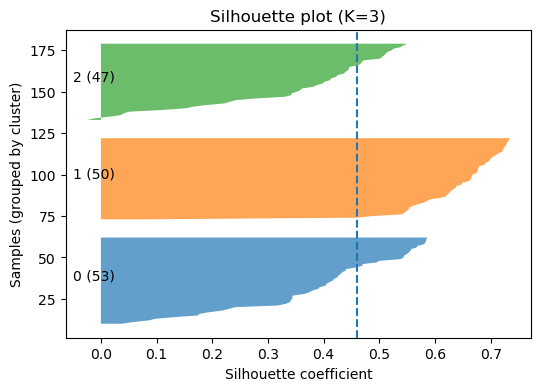

In [53]:
# 샘플별 실루엣 분포 플롯 그리기
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data

k = 3

pipe = Pipeline([
  ("scaler", StandardScaler()),
  ("kmeans", KMeans(n_clusters=k, n_init=10, random_state=42))
])
labels = pipe.fit_predict(X)
sample_sil = silhouette_samples(pipe.named_steps["scaler"].transform(X), labels) 

print(f"K={k} 평균 실루엣: {sample_sil.mean():.4f}")

# 군집별 정렬 후 막대 분포 그리기
plt.figure(figsize=(6,4))

y_lower = 10 # 첫 군집 막대 그래프 시작 높이를 10으로 잡아 여백 확보
for label in range(k):
  vals = sample_sil[labels == label]
  vals.sort()
  
  label_size = vals.shape[0] # 해당 군집에 포함된 샘플 수
  y_upper = y_lower + label_size

  # plt.fill_between(x, y1, y2) : x축 방향으로 y1 ~ y2 사이를 채움. 즉, x축 따라 세로 막대 쌓기
  # plt.fill_betweenx(y, x1, x2) : y축 방향으로 x1 ~ x2 사이를 채움. 즉, y축 따라 가로 막대 쌓기
  plt.fill_betweenx(np.arange(y_lower, y_upper), 0, vals, alpha=0.7)
  plt.text(-0.05, y_lower + 0.5*label_size, f"{label} ({label_size})")
  y_lower = y_upper + 10 # 군집 간 간격

plt.axvline(x=sample_sil.mean(), linestyle='--')
plt.xlabel("Silhouette coefficient")
plt.ylabel("Samples (grouped by cluster)")
plt.title(f"Silhouette plot (K={k})")
plt.show()

각 군집 막대가 세로로 두껍고 1에 가까울수록 좋음<br>
0 근처 / 음수가 많은 군집은 경계가 애매하거나 잘못 배정된 포인트가 많다는 뜻

<br>
PCA로 차원 축소 후 실루엣 점수의 변화 비교

In [48]:
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = load_iris()
X = iris.data

K_range = range(2, 10)
scores_raw = []
scores_pca = []

for k in K_range:
	# Raw (4D)
	pipe_raw = Pipeline([
		("scaler", StandardScaler()),
		("kmenas", KMeans(n_clusters=k, n_init=10, random_state=42))
	])
	labels_raw = pipe_raw.fit_predict(X)
	X_scaled = pipe_raw.named_steps["scaler"].transform(X)
	scores_raw.append(silhouette_score(X_scaled, labels_raw))
	
	# PCA (2D)
	pipe_pca = Pipeline([
		("scaler", StandardScaler()),
		("pca", PCA(n_components=2, random_state=42)),
		("kmeans", KMeans(n_clusters=k, n_init=10, random_state=42))
	])
	labels_pca = pipe_pca.fit_predict(X)
	X_pca = pipe_pca.named_steps["pca"].transform(pipe_pca.named_steps["scaler"].transform(X))
	scores_pca.append(silhouette_score(X_pca, labels_pca))
	
print(" K |  raw   | PCA 2D")
for k, sr, sp in zip(K_range, scores_raw, scores_pca):
	print(f"{k:2d} | {sr:.4f} | {sp:.4f}")

c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: User

 K |  raw   | PCA 2D
 2 | 0.5818 | 0.6145
 3 | 0.4599 | 0.5092
 4 | 0.3869 | 0.4409
 5 | 0.3459 | 0.4156
 6 | 0.3171 | 0.4140
 7 | 0.3202 | 0.4155
 8 | 0.3387 | 0.4163
 9 | 0.3424 | 0.4409


c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


- PCA로 노이즈 감소 : 구조가 선형적으로 잘 펴지면 실루엣이 좋아질 수 있음
- BUT, 정보가 과도하게 압축되면 점수 떨어질 수도 있음

<br><br>
2. PCA<br>
 : 데이터들의 분산값이 큰 방향으로, 즉 가장 덜 편향적인 방향으로 축을 잡아서 차원을 줄이는 방법<br>
  → 특성의 단위/범위 영향을 받으므로 스케일링 권장

c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


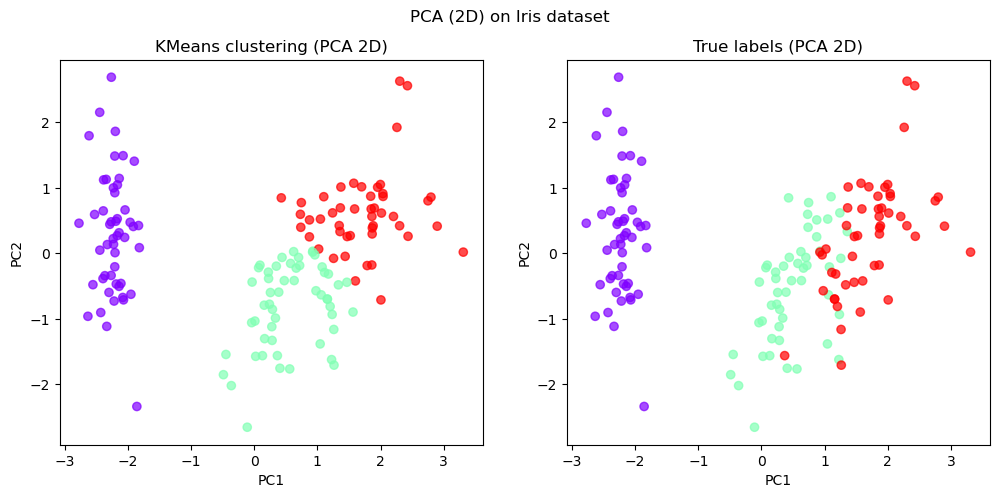

In [44]:
# Iris 데이터(4D) PCA(2D)+Kmeans 후 실제 품종 레이블과 비교
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target # 실제 품종 레이블

pipe = Pipeline([
  ("scaler", StandardScaler()),
  ("pca", PCA(n_components=2, random_state=42)),
  ("kmeans", KMeans(n_clusters=3, random_state=42, n_init=10))
])
pipe.fit(X)

# PCA 변환된 데이터 얻기
X_pca = pipe.named_steps["pca"].transform(
  pipe.named_steps["scaler"].transform(X)
)
labels = pipe.named_steps["kmeans"].labels_

# 군집 매핑 (색상 맞추기)
cm = confusion_matrix(y, labels) # 행: 실제 클래스, 열: cluster 번호
mapping = np.argmax(cm, axis=1)
"""
np.argmax 가장 큰 값의 인덱스 반환 (axis=1 : 각 행에서 가장 큰 열 인덱스 찾기)
=> 혼동행렬에서 각 클래스마다 가장 많이 겹친 cluster 번호 찾기
즉, 실제 클래스에 대응하는 군집 번호
"""
labels = np.array([mapping[label] for label in labels])

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# 1) 군집 : KMeans 결과
axes[0].scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="rainbow", alpha=0.7)
axes[0].set_title("KMeans clustering (PCA 2D)")

# 2) 실제 품종 레이블
axes[1].scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="rainbow", alpha=0.7)
axes[1].set_title("True labels (PCA 2D)")

for ax in axes:
  ax.set_xlabel("PC1")
  ax.set_ylabel("PC2")

plt.suptitle("PCA (2D) on Iris dataset")
plt.show()

KMeans 결과(왼) : 모델이 데이터 패턴만 보고 군집화한 결과<br>
True labels(오) : 실제 Iris 3품종 라벨


=> Setosa는 깔끔히 분리되었지만 Versicolor와 Virginica는 일부 혼동

In [ ]:
# 각 주성분(PC)이 데이터 전체 분산 중 몇 %를 설명하는지 확인
pipe_expl = Pipeline([
  ("scaler", StandardScaler()),
  ("pca", PCA(n_components=4, random_state=42))
])
pipe_expl.fit(X)

# 분산 비율 출력
explained = pipe_expl.named_steps["pca"].explained_variance_ratio_
cumulative = explained.cumsum()

for i, (var, cum) in enumerate(zip(explained, cumulative), start=1): # enumerate의 인덱스 카운트를 1로 시작
  print(f"PC{i}: {var:.4f} (누적: {cum:.4f})")

PC1: 0.7296 (누적: 0.7296)
PC2: 0.2285 (누적: 0.9581)
PC3: 0.0367 (누적: 0.9948)
PC4: 0.0052 (누적: 1.0000)


3. 비지도 학습 확장
- 군집화 알고리즘 : KMeans, Agglomerative clustring, DBSCAN
- 차원 축소 기법 : PCA (선형), t-SNE, UMAP

군집화 확장 : Hierarchical Clustering (Agglomerative)

[Agglomerative] silhouette: 0.4467


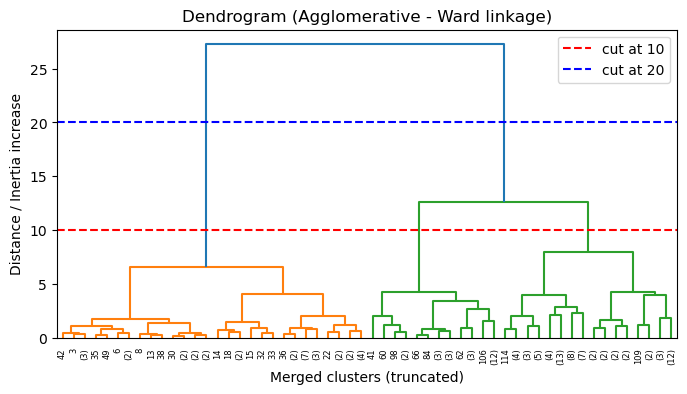

cut at 10 -> 군집 수: 3
cut at 20 -> 군집 수: 2


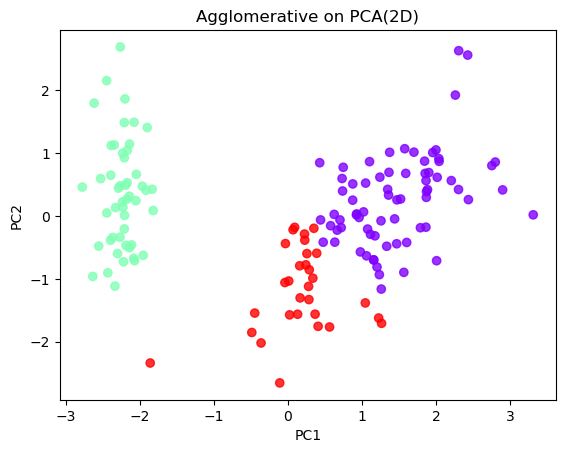

In [70]:
# Agglomerative Clustering + 덴드로그램
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data

pipe_agg = Pipeline([
  ("scaler", StandardScaler()),
  ("agg", AgglomerativeClustering(n_clusters=3, linkage="ward"))
])
labels_agg = pipe_agg.fit_predict(X)

X_scaled = pipe_agg.named_steps["scaler"].transform(X)
sil_agg = silhouette_score(X_scaled, labels_agg)
print(f"[Agglomerative] silhouette: {sil_agg:.4f}")

# 덴드로그램 (linkage는 스케일된 데이터 기준으로)
Z = linkage(X_scaled, method="ward")
# linkage : 계층적 병합 과정 정보 (누가 누구랑 합쳐졌는지, 거리는 얼마였는지 등)
plt.figure(figsize=(8,4))
dendrogram(Z, truncate_mode="level", p=5)

# 수평 컷 표시
plt.axhline(y=10, c="red", linestyle="--", label="cut at 10")
plt.axhline(y=20, c="blue", linestyle="--", label="cut at 20")

plt.title("Dendrogram (Agglomerative - Ward linkage)")
plt.xlabel("Merged clusters (truncated)")
plt.ylabel("Distance / Inertia increase")
plt.legend()
plt.show()

# fcluster로 군집 라벨 추측
# flat cluster : 트리를 수평으로 컷했을 때의 샘플의 군집 라벨(번호) 반환 => [1 1 2 3 ...]
labels_cut10 = fcluster(Z, t=10, criterion="distance")
labels_cut20 = fcluster(Z, t=20, criterion="distance")

print("cut at 10 -> 군집 수:", len(set(labels_cut10)))
print("cut at 20 -> 군집 수:", len(set(labels_cut20)))

try:
    from sklearn.decomposition import PCA
    p2 = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=2, random_state=42))]).fit(X)
    X_pca2 = p2.transform(X)
    plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels_agg, cmap="rainbow", alpha=0.8)
    plt.title("Agglomerative on PCA(2D)")
    plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.show()
except Exception as e:
    print("PCA 시각화는 옵션입니다:", e)

군집화 확장 : DBSCAN

[DBSCAN] silhouette (noise exclued): 0.5979
[DBSCAN] noise ratio: 2.67%


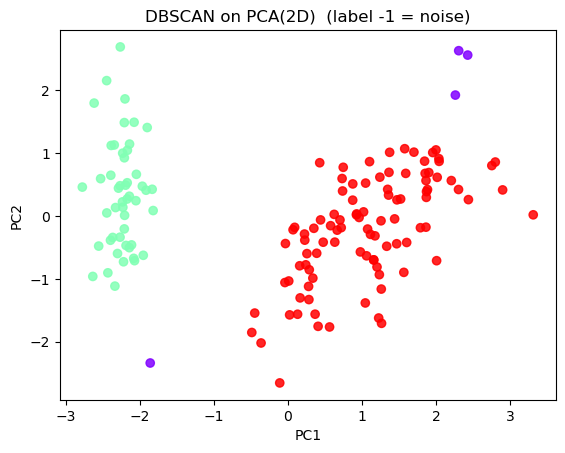

In [72]:
# DBSCAN (밀도 기반 군집 + 이상치 탐지)
from sklearn.cluster import DBSCAN

pipe_db = Pipeline([
  ("scaler", StandardScaler()),
  ("db", DBSCAN(eps=0.8, min_samples=5)) # eps는 스케일된 공간 기준
])

labels_db = pipe_db.fit_predict(X)
X_scaled_db = pipe_db.named_steps["scaler"].transform(X)

# 실루엣 점수 : 노이즈(-1) 제거 + 군집이 2 이상일때만
mask = labels_db != -1
if np.sum(mask) > 0 and len(np.unique(labels_db[mask])) >=2 :
  sil_db = silhouette_score(X_scaled_db[mask], labels_db[mask])
  print(f"[DBSCAN] silhouette (noise exclued): {sil_db:.4f}")
else:
  print(f"[DBSCAN] 유효 군집 수 부족으로 silhouette 계산 불가")

noise_ratio = np.mean(labels_db == -1)
print(f"[DBSCAN] noise ratio: {noise_ratio:.2%}")

try:
    from sklearn.decomposition import PCA
    X_pca2 = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=2, random_state=42))]).fit_transform(X)
    plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels_db, cmap="rainbow", alpha=0.85)
    plt.title("DBSCAN on PCA(2D)  (label -1 = noise)")
    plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.show()
except Exception as e:
    print("PCA 시각화는 옵션입니다:", e)

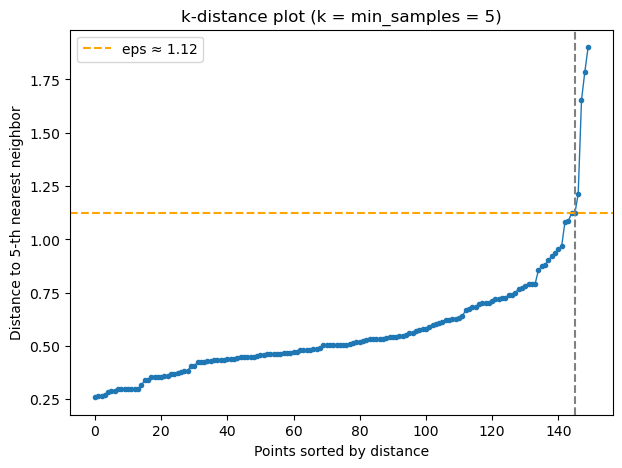

추천 eps (대략): 1.123 (knee index: 145)


In [ ]:
"""
DBSCAN용 k-distance plot

군집이 되려면 최소한 "이웃이 든든하게" 있어야 함
=> 반경 eps 안에 최소 min_samples개의 이웃이 존재하는 게 군집
따라서, k = min_samples (of DBSCAN)
- min_samples가 작을수록: 작은 그룹도 군집으로 인정 → 군집 수 ↑, 노이즈 ↓
- min_samples가 클수록: 밀도가 높아야 군집으로 인정 → 군집 수 ↓, 노이즈 ↑

모든 샘플에 대해 k+1 nearest 이웃 탐색
(자기자신이 포함되므로 k번째를 구하기 위해 k+1개 이웃 탐색)
=> 2차원 배열
- 행 : 각 샘플
- 열 : k+1 nearset 이웃과의 거리 (가까운 순) -> 첫 열은 거리 0인 자기자신

예) (4, 3) (4, 3)   # 4개 점 × 3개 이웃

distances =
[[0. 1. 3.]
 [0. 1. 2.]
 [0. 2. 2.]
 [0. 7. 9.]]

indices =
[[0 1 2]
 [1 0 2]
 [2 1 0]
 [3 2 1]]

이때, 각 샘플의 k번째 이웃과의 거리를 모두 뽑아 정렬 후 그래프화
-> 꺾이는 지점(elbow/knee)가 eps 후보
(급격히 변하는 지점이 반경 경계니까)

"""
from sklearn.neighbors import NearestNeighbors

X_scaled = StandardScaler().fit_transform(X)

k = 5 # DBSCAN의 min_samples와 동일

nbrs = NearestNeighbors(n_neighbors=k+1, algorithm="auto").fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled) # 모든 샘플(행)에 대해 이웃과의 거리 배열(가까운 순), 이웃의 순서 인덱스
kth_dist = distances[:,-1]

# 시각화(엘보우) 위해 정렬
kth_dist_sorted = np.sort(kth_dist)

plt.figure(figsize=(7,5))
plt.plot(kth_dist_sorted, marker='.', linewidth=1)
plt.title(f"k-distance plot (k = min_samples = {k})")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"Distance to {k}-th nearest neighbor")

# 간단한 knee(=elbow, 급격히 꺾이는 지점) 측정
# 완벽하지 않지만, 1/2차 차분을 통해 곡률이 큰 지점, 즉 급격히 증가하는 지점을 후보로 잡는다
"""
차분(difference) vs 미분(derivative)
- 미분: 함수 f(x)의 순간변화율. -> 극한을 이용해 아주 미세한 변화까지 계산
- 차분: 이산 데이터에서 옆 값과의 차이로 기울기를 근사. 즉 "이산적인 근사 미분"

np.gradient : 배열의 기울기(변화율)을 근사 계산
- np.gradient(y) : 1차 차분 근사 -> 곡선의 기울기(증가 속도)
- np.gradient(np.gradient(y)) : 2차 차분 근사 -> 곡선 기울기의 "변화율"(곡률)
=> k-distance plot의 knee 찾는데 활용 

np.argmax : 배열에서 가장 큰 값의 인덱스 반환
"""
g1 = np.gradient(kth_dist_sorted)
g2 = np.gradient(g1)
knee_idx = np.argmax(g2) # 곡률 최대 지점
eps_suggest = kth_dist_sorted[knee_idx]

plt.axvline(knee_idx, linestyle="--", color="gray")
plt.axhline(eps_suggest, linestyle="--", color="orange", label=f"eps ≈ {eps_suggest:.2f}")
plt.legend()
plt.show()

print(f"추천 eps (대략): {eps_suggest:.3f} (knee index: {knee_idx})")

[DBSCAN] 추천 eps 적용
군집 수(노이즈 제외): 2, noise_ratio: 1.33%


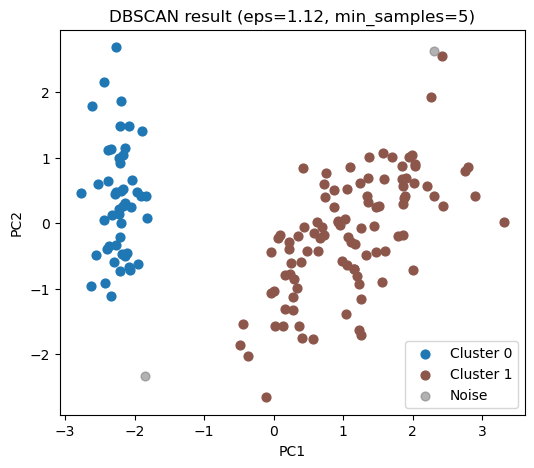

In [76]:
# 추천 eps DBSCAN에 적용
db = DBSCAN(eps=eps_suggest, min_samples=k)
labels = db.fit_predict(X_scaled)

# 결과
noise_ratio = np.mean(labels == -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"[DBSCAN] 추천 eps 적용\n군집 수(노이즈 제외): {n_clusters}, noise_ratio: {noise_ratio:.2%}")

# PCA 2D
X_pca = PCA(n_components=2, random_state=42).fit_transform(X_scaled)

# 시각화 (노이즈 -1은 회색)
plt.figure(figsize=(6,5))
unique_labels = set(labels) # 클러스터링된 군집 수
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels))) # 군집 수 만큼 컬러 뽑기

for lab, col in zip(unique_labels, colors):
  if lab == -1:
    col = (0.5, 0.5, 0.5, 0.6) # 회색 (노이즈)
  plt.scatter(X_pca[labels == lab, 0], X_pca[labels == lab, 1],
              c=[col], label=f"Cluster {lab}" if lab != -1 else "Noise", s=40)
  
plt.title(f"DBSCAN result (eps={eps_suggest:.2f}, min_samples={k})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# Iris 특성상 DBSCAN으로는 Setora vs Others로 분류됨

<br>차원축소 확장 : t-SNE<br><br>

t-SNE : 비선형 차원축소/시각화 특화

PCA는 데이터 전체 분산이 큰 방향을 찾는 선형 기법으로,<br>
전역(global) 구조 보존하지만 지역(local) 구조 보존은 떨어짐

but, 고차원 데이터를 2D로 줄여서 볼땐,<br>
"비슷한 샘플끼리는 2D에서도 가깝게, 다른 샘플은 멀리"가 중요<br>
=> t-SNE : 국소적 구조(local structure) 보존에 집중한 차원축소/시각화 기법

t-SNE
- "고차원 이웃관계 확률"과 "저차원 이웃관계 확률"을 최대한 비슷하게 만드는 좌표 매칭 (이웃관계 보존)
- perplexity : <br>이웃 몇 명까지 중요하게 볼지를 정하는 하이퍼파라미터<br>
               5 ~ 50으로 조정. 작을수록 국소 집중/ 클수록 전역 보존

장점)
- 고차원 데이터의 군집 구조를 2D/3D에서 예쁘게 시각화
- 특히 이미지, 텍스트 임베딩처럼 고차원 데이터에서 "클래스별로 뭉쳐진 구조"를 잘 캐치

단점)
- 계산량 많아서 속도 느림 -> 주로 시각화용
- 결과가 확률적 (random_state 따라 조금씩 다를 수 있음)
- 전역 구조(군집 간 거리 비율)은 왜곡될 수 있어 해석 시 주의

t-SNE도 거리 기반 -> 스케일링 필수<br>
fit_transform 후 결과는 (n_samples, n_components)으로 2D 좌표

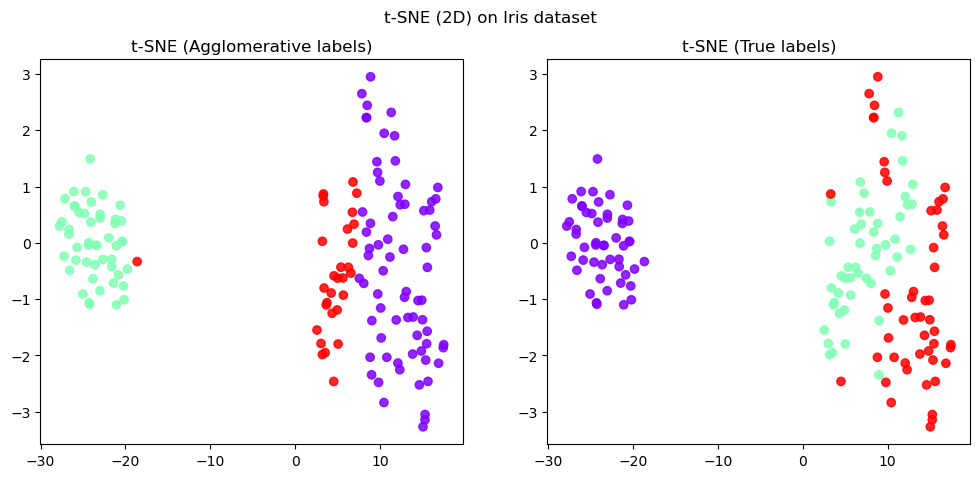

In [85]:
# t-SNE with Iris
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target

# t-SNE는 fit_transform만 지원
pipe_tsne = Pipeline([
  ("scaler", StandardScaler()),
  ("tsne", TSNE(n_components=2, random_state=42,
                perplexity=30, learning_rate="auto", init="pca"))
]) # perplexity를 5, 30, 50으로 바꿔보면 군집 모양이 어떻게 달라지는지 비교 가능
"""
- learning_rate
t-SNE는 고차원 이웃관계 확률과 저차원 이웃관계 확률을 맞출때,
KL divergence를 최소화하는 확률적 경사하강법(SGD) 최적화를 사용.
이때, "한 번 업데이트할 때 좌표를 얼마나 크게 움직일지"를 정하는 게 learning_rate
** KL divergence : 확률분포(P,Q)가 있을때 Q가 P를 얼마나 잘 따라가는가 (낮을수록 잘 따라감)

- init : t-SNE의 최적화 시작점
-> "random"은 처음 위치를 무작위 배치 / "pca"는 PCA로 차원축소한 결과를 초기값으로 사용(안정적)

"""
X_tsne = pipe_tsne.fit_transform(X)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# 군집 라벨로 색칠 (with Agglomerative)
axes[0].scatter(X_tsne[:,0], X_tsne[:,1], c=labels_agg, cmap='rainbow', alpha=0.85)
axes[0].set_title("t-SNE (Agglomerative labels)")

# 실제 품종으로 색칠
axes[1].scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='rainbow', alpha=0.85)
axes[1].set_title("t-SNE (True labels)")

plt.suptitle("t-SNE (2D) on Iris dataset")
plt.show()


-> t-SNE가 고차원의 "이웃 구조"를 잘 보존해서, 비슷한 샘플끼리 (상대적으로) 가깝게 모여 있는 모습이 잘 나타났음<br>
(PCA랑 비교해보면 확실히 Setosa가 서로 엄청 붙어있음)

클러스터 사이 거리보단 클러스터 내부/주변 이웃관계를 신뢰<br>
PCA로 30~50차까지 축소(전처리) 후 t-SNE 사용하면 속도/안정성 증가(Iris는 4차라 생략)

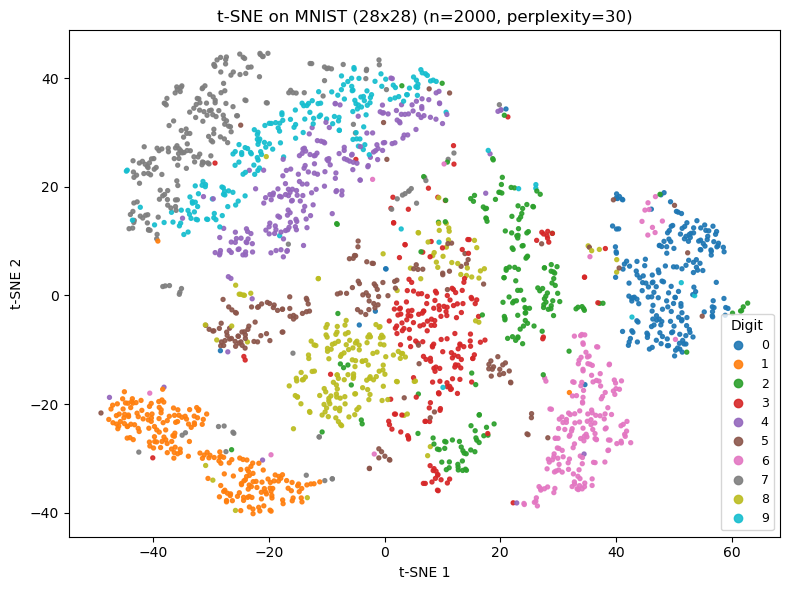

In [88]:
# t-SNE with MNIST
"""
MNIST
: 손글씨 숫자 0~9 흑백 이미지(28 x 28 = "784차원") 70,000장(train 60k/test 10k)
- fetch_openml('mnist_784')로 로드
- 표준화 -> PCA(50) -> t-SNE(2D)
- 실습에서도 속도 확보를 위해 2000개로 제한(샘플링)
** load_digits : MNIST 폴백용 내장 데이터셋. 8 x 8 = 64차원
"""
from sklearn.datasets import fetch_openml, load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드 (실패 시 digits로 폴백)
use_fallback = False
try:
  mnist = fetch_openml('mnist_784', version=1, as_frame=False) # X: (70000, 784), y: str
  X, y = mnist.data, mnist.target.astype(int)
  dataset_name = "MNIST (28x28)"
except Exception as e:
  print("MNIST 로드 실패, sklearn digits(8x8)로 대체:", e)
  dg = load_digits()
  X, y = dg.data, dg.target
  dataset_name = "Digits (8x8)"
  use_fallback = True

# 서브 샘플링
n_samples = 2000 if X.shape[0] >= 2000 else X.shape[0]
rng = np.random.default_rng(42)
idx = rng.choice(X.shape[0], size=n_samples, replace=False) # replace=False : 중복없이 샘플링
X_sub, y_sub = X[idx], y[idx]

# 스케일링 -> PCA 50D -> t-SNE : 안정/속도 향상
"""
StandardScaler의 표준화 = 각 특성을 평균 0, 분산 1로 변환 (x_ = (x-mu)/sigma)
- with_mean=True : 디폴트. 평균을 빼고 분산을 1로 맞추는 정상 표준화
- with_mean=False : 평균을 빼지 않고, 분산만 1로 맞춤 (주로 희소행렬에서 사용)
>> MNIST는 정상 표준화, digits가 희소 행렬인 경우를 대비해서 안전하게 with_mean=Flase 처리
"""
X_std = StandardScaler(with_mean=not use_fallback).fit_transform(X_sub)

n_pca = min(50, X_std.shape[1] - 1) # 차원보다 크게 잡히지 않도록 전처리
X_pca = PCA(n_components=n_pca, random_state=42).fit_transform(X_std)

perplexity = 30
tsne = TSNE(
  n_components=2,
  perplexity=perplexity,
  learning_rate="auto",
  init="pca",
  random_state=42
)
X_tsne = tsne.fit_transform(X_pca)

# 시각화
plt.figure(figsize=(8,6))

scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_sub, cmap='tab10', s=8, alpha=0.9)

# 범례(0~9 레벨) : prop='colors'로 색깔별로 그룹화해서, num=10개 범례 항목 생성
handles, _ = scatter.legend_elements(prop='colors', num=10)
plt.legend(handles, list(range(10)), title="Digit", loc="best", fontsize=9)

plt.title(f"t-SNE on {dataset_name} (n={n_samples}, perplexity={perplexity})")
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()

- 좌표축 값 자체엔 의미가 없음! "상대적 거리/뭉침"이 중요
- "같은 숫자(라벨)이 잘 모이면, 임베딩이 국소 구조를 잘 보존한 것."
- perplexity(5~50), n_samples, PCA(30~50) 에 따라 군집 모양 변화

실습 결과 해석
- 덩어리 크고 고립되어있을수록 깔끔하게 잘 분리된 것 : 0(파랑), 1(주홍), 6(핑크), 9(하늘)
- 경계가 애매한 클래스 : 3(빨강), 4(보라), 5(갈색)
- 복잡한 혼합 : 2(초록), 7(회색), 8(연두) - 서로 인접한 채 부분적으로 섞여있음<br>-> 고차원에서 분포가 겹치는 부분이 있기 때문 (t-SNE가 국소 구조는 보존했지만 완벽히 분리하진 못했다)

전반적인 해석
- t-SNE는 다수의 클래스를 가진 데이터에서, 사람 눈으로 파악할 수 있게 고차원->2D 도구
- 실습에서 0~9가 대부분 잘 뭉쳐서 구분되었지만, 일부 모양이 비슷한 숫자(3/5/8)은 경계가 애매<br>-> t-SNE의 문제라기 보다는, 데이터 자체의 모호성이 원인

즉, t-SNE가 사람 눈에도 구분이 쉬운 건 잘 모으고 애매한 건 겹친다

<br>차원축소 확장 : UMAP<br><br>
0. 채널 설정하여 umap-learn설치<br>
: conda install -c conda-forge umap-learn

c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


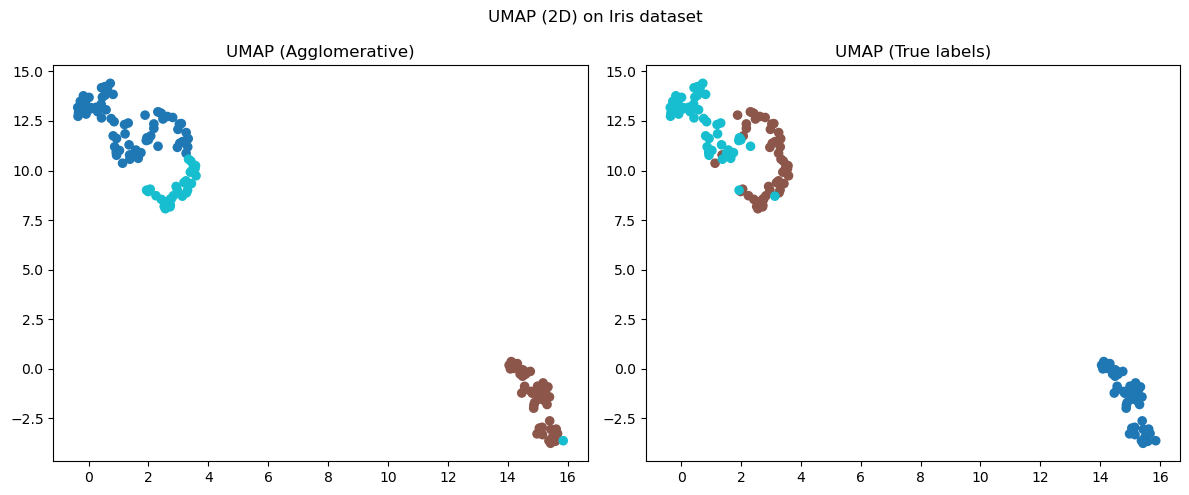

In [11]:
# UMAP with Iris
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering
import umap
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target

X_scaled = StandardScaler().fit_transform(X)
labels_agg = AgglomerativeClustering(
  n_clusters=3, linkage="ward").fit_predict(X_scaled)

um = umap.UMAP(n_components=2, random_state=42,
               n_neighbors=15, min_dist=0.1)
X_umap = um.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].scatter(X_umap[:,0], X_umap[:,1], c=labels_agg, cmap='tab10', s=35)
axes[0].set_title("UMAP (Agglomerative)")

axes[1].scatter(X_umap[:,0], X_umap[:,1], c=y, cmap='tab10', s=35)
axes[1].set_title("UMAP (True labels)")

plt.suptitle("UMAP (2D) on Iris dataset")
plt.tight_layout()
plt.show()

c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


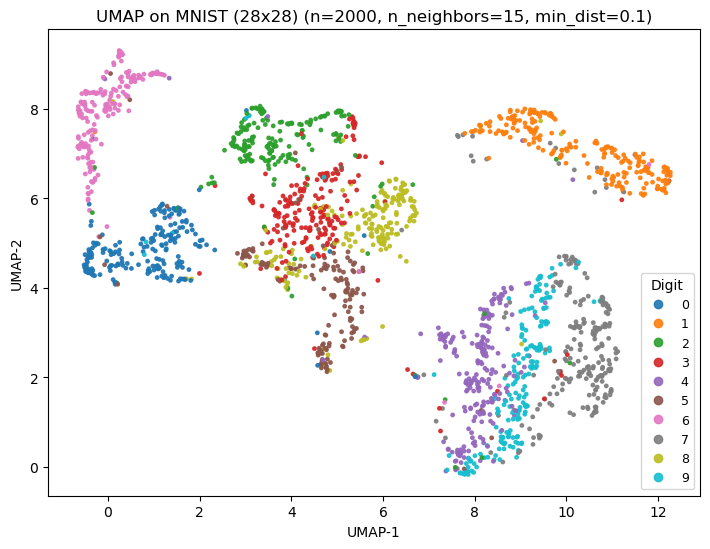

In [1]:
# UMAP with MNIST
# 2k 샘플링 > 스케일링 > PCA 50D > UMAP 2D
from sklearn.datasets import fetch_openml, load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap
import numpy as np
import matplotlib.pyplot as plt

use_fallback = False
try:
  mnist = fetch_openml('mnist_784', version=1, as_frame=False)
  X, y = mnist.data, mnist.target.astype(int)
  name = "MNIST (28x28)"
except Exception as e:
  print("[경고] MNIST 로드 실패, digits(8x8)로 대체:", e)
  dg = load_digits()
  X, y = dg.data, dg.target
  name = "Digits (8x8)"
  use_fallback = True

n_samples = 2000 if X.shape[0] > 2000 else X.shape[0]

rng = np.random.default_rng(42)
idx = rng.choice(X.shape[0], size=n_samples, replace=False)
X_sub, y_sub = X[idx], y[idx]

X_std = StandardScaler(with_mean=not use_fallback).fit_transform(X_sub)

n_pca = min(50, X_std.shape[1] - 1)
X_pca = PCA(n_components=n_pca, random_state=42).fit_transform(X_std)

n_neighbors = 15
min_dist = 0.1
um = umap.UMAP(n_components=2, random_state=42, n_neighbors=n_neighbors, min_dist=min_dist)
X_umap = um.fit_transform(X_pca)

plt.figure(figsize=(7.2, 5.6))
sc = plt.scatter(X_umap[:,0], X_umap[:,1], c=y_sub, cmap='tab10', s=6, alpha=0.9)

handles, _ = sc.legend_elements(prop='colors', num=10)
plt.legend(handles, list(range(10)), title='Digit', fontsize=9)

plt.title(f"UMAP on {name} (n={n_samples}, n_neighbors={n_neighbors}, min_dist={min_dist})")
plt.xlabel("UMAP-1"); plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()

c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\umap\umap_.py:1952: UserWarn

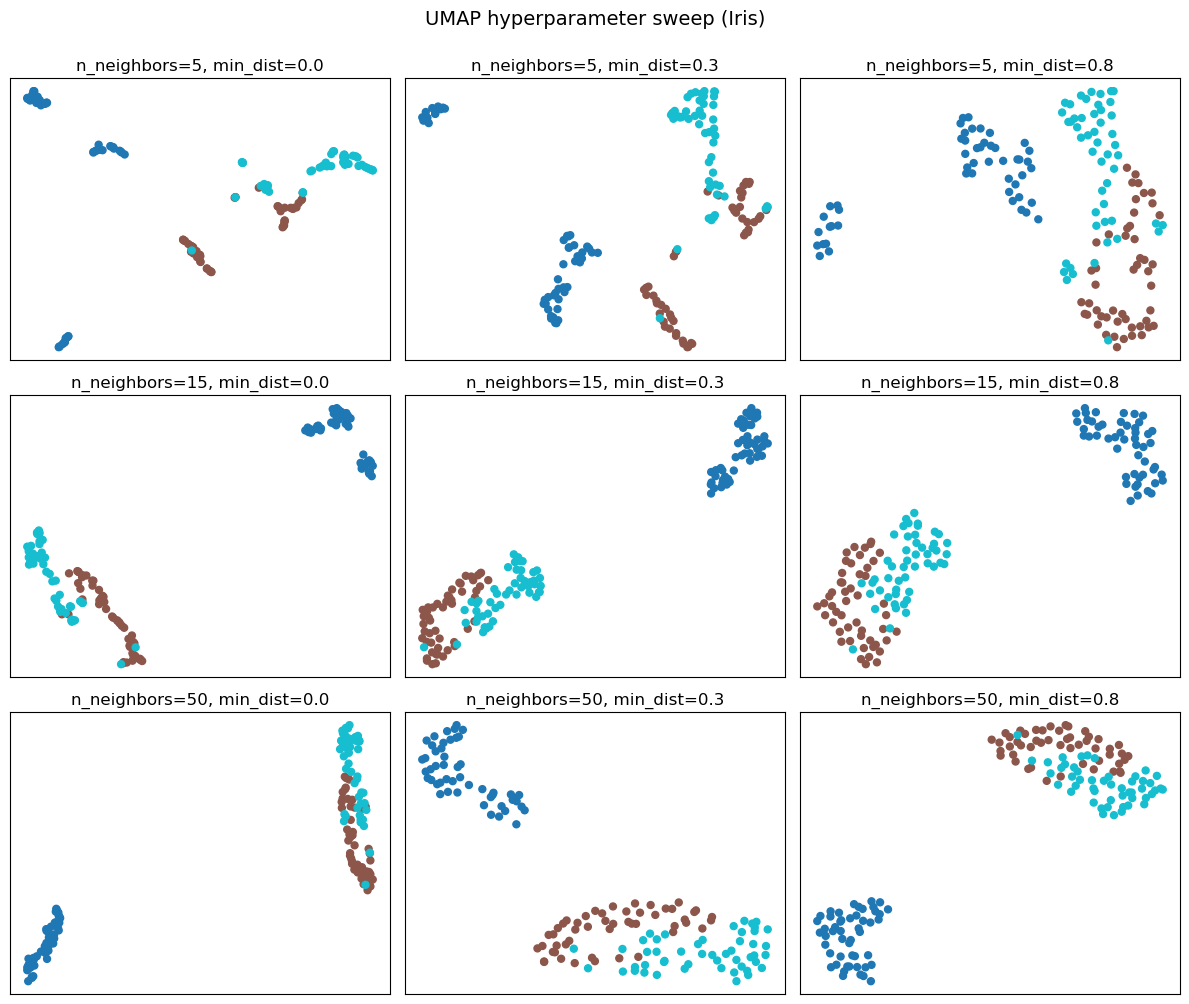

In [3]:
# UMAP 하이퍼파라미터 스윕 (iris로 빠르게)
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X, y = iris.data, iris.target

X_scaled = StandardScaler().fit_transform(X)

n_neighbors_list = [5, 15, 50]
min_dist_list = [0.0, 0.3, 0.8]

fig,axes = plt.subplots(len(n_neighbors_list), len(min_dist_list), figsize=(12,10))
for i, nn in enumerate(n_neighbors_list):
  for j, md in enumerate(min_dist_list):
    um = umap.UMAP(n_components=2, random_state=42, n_neighbors=nn, min_dist=md)
    X_um = um.fit_transform(X_scaled)

    ax = axes[i, j]
    ax.scatter(X_um[:,0], X_um[:,1], c=y, cmap='tab10', s=25)
    ax.set_title(f"n_neighbors={nn}, min_dist={md}")
    ax.set_xticks([]); ax.set_yticks([])
plt.suptitle("UMAP hyperparameter sweep (Iris)", y=1, fontsize=14)
plt.tight_layout()
plt.show()